In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
vaccine_data = pd.read_csv('country_vaccinations.csv')

In [9]:
print(vaccine_data.columns)

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')


In [10]:
vaccine_data.sample(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
14847,United Kingdom,GBR,2021-02-03,10992444.0,10490487.0,501957.0,472011.0,434171.0,16.19,15.45,0.74,6396.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
9411,Montenegro,MNE,2021-02-23,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,355.0,"Sinopharm/Beijing, Sputnik V",Government of Montenegro,https://www.covidodgovor.me/
5088,Germany,DEU,2021-01-15,1119202.0,1116698.0,2504.0,91540.0,76146.0,1.34,1.33,0.00,909.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
250,Andorra,AND,2021-03-18,NaN,NaN,NaN,NaN,493.0,NaN,NaN,NaN,6381.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
8242,Liechtenstein,LIE,2021-04-15,8572.0,5590.0,2982.0,297.0,203.0,22.48,14.66,7.82,5323.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
6437,Indonesia,IDN,2021-01-24,149242.0,149242.0,NaN,NaN,11892.0,0.05,0.05,NaN,43.0,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
9266,Monaco,MCO,2021-02-13,NaN,NaN,NaN,NaN,294.0,NaN,NaN,NaN,7492.0,Pfizer/BioNTech,National Council,https://www.facebook.com/GvtMonaco/posts/27190...
12952,Singapore,SGP,2021-02-19,NaN,NaN,NaN,NaN,13286.0,NaN,NaN,NaN,2271.0,"Moderna, Pfizer/BioNTech",Ministry of Health,https://www.moh.gov.sg/covid-19
11682,Romania,ROU,2021-02-26,1506032.0,890068.0,615964.0,19125.0,26811.0,7.83,4.63,3.20,1394.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Government of Romania,https://datelazi.ro/
11762,Russia,RUS,2020-12-26,NaN,NaN,NaN,NaN,40296.0,NaN,NaN,NaN,276.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats


In [11]:
iso_codes = set(vaccine_data['iso_code'])
print(iso_codes)

{'LIE', 'MDV', 'NPL', 'NER', 'JPN', 'AGO', 'TUN', 'PSE', 'MSR', 'BOL', 'BTN', 'MLT', 'QAT', 'LCA', 'SYR', 'BHR', 'OWID_SCT', 'PNG', 'SEN', 'EST', 'CIV', 'GUY', 'MCO', 'MYS', 'TUR', 'USA', 'ESP', 'ISR', 'EGY', 'ZMB', 'CYP', 'PRT', 'KOR', 'TWN', 'MUS', 'AIA', 'DJI', 'HKG', 'MDA', 'CRI', 'MAC', 'IMN', 'CAN', 'MAR', 'FRA', 'PAK', 'IRN', 'ROU', 'KWT', 'UGA', 'LBY', 'URY', 'OWID_WLS', 'SVK', 'MNG', 'SDN', 'IRL', 'JAM', 'DEU', 'BEL', 'BRA', 'HND', 'NAM', 'MNE', 'TCA', 'ARM', 'POL', 'BGD', 'CPV', 'ALB', 'STP', 'GHA', 'OWID_KOS', 'TGO', 'AZE', 'HRV', 'ECU', 'IDN', 'WSM', 'GRD', 'DNK', 'MRT', 'SOM', 'NOR', 'FJI', 'RWA', 'LAO', 'ZAF', 'DOM', 'LVA', 'GIB', 'GIN', 'HUN', 'LSO', 'FIN', 'GGY', 'JOR', 'SRB', 'GAB', 'LTU', 'LBN', 'KEN', 'PAN', 'TTO', 'BGR', 'KHM', 'BRB', 'CHE', 'UKR', 'VCT', 'JEY', 'VNM', 'MMR', 'FLK', 'MKD', 'MWI', 'AUT', 'DZA', 'COD', 'SAU', 'GNQ', 'SMR', 'BIH', 'PRY', 'SWE', 'THA', 'TON', 'BLZ', 'KGZ', 'AUS', 'TLS', 'CUW', 'CHN', 'NLD', 'SVN', 'VEN', 'AND', 'NZL', 'GEO', 'GMB', 'CHL

In [12]:
def get_country_data(vaccine_data, country_iso_code, start_date='2021-01-15', end_date='2021-05-01'):
    country_data = vaccine_data[vaccine_data['iso_code'] == country_iso_code].fillna(method='ffill')
    return country_data[(country_data['date'] >= start_date) & (country_data['date'] <= end_date)]

In [13]:
def add_country_plot(country_iso_code, feature, xlabel, ylabel):
    current_country = get_country_data(vaccine_data, country_iso_code)
    # Now we sort the data by date
    current_country.sort_values('date')
    plt.plot(current_country['date'],
             current_country[feature],
             linestyle = 'dotted', label = country_iso_code)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks([0, 30, 60, 90, 120], ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
    plt.legend()

In [14]:
def get_line_plot(countries_iso, feature, xlabel, ylabel):
    plt.clf()
    for iso in countries_iso:
        add_country_plot(iso, feature, xlabel, ylabel)
    plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


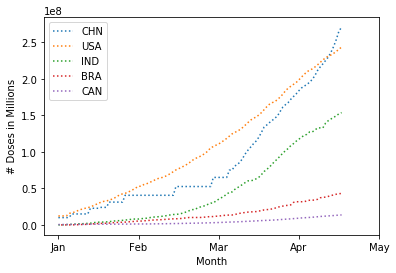

In [15]:
get_line_plot(["CHN", "USA","IND","BRA", "CAN"], 
         feature="total_vaccinations", 
         xlabel = "Month", 
         ylabel="# Doses in Millions")

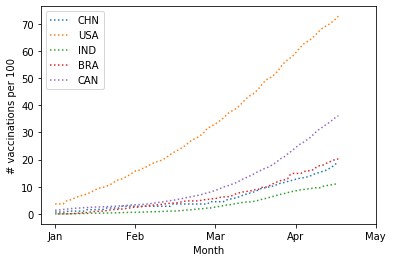

In [16]:
get_line_plot(["CHN", "USA","IND","BRA","CAN"], 
         feature="total_vaccinations_per_hundred", 
         xlabel = "Month", 
         ylabel="# vaccinations per 100")

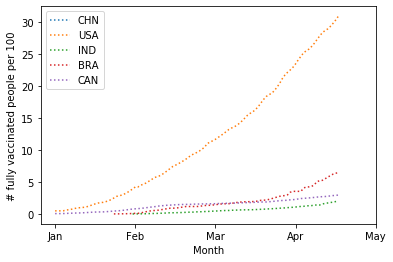

In [17]:
get_line_plot(["CHN", "USA","IND","BRA","CAN"], 
         feature="people_fully_vaccinated_per_hundred", 
         xlabel = "Month", 
         ylabel="# fully vaccinated people per 100")

In [90]:
def get_aggregated_country_stats(features, replace_missing_values_with=-1):
    country_stats = {}
    for iso_code in iso_codes:
        country_stats[iso_code] = {}
        for feature in features:
            country_data = get_country_data(vaccine_data, iso_code)
            country_stats[iso_code][feature] = max(country_data[feature].fillna(replace_missing_values_with))
    
    return pd.DataFrame.from_dict(country_stats).T

def get_top_k_countries (df, feature, k=10):
    top_k = df.sort_values(feature, ascending=False).head(k)
    top_k = top_k[[feature,'country', 'iso_code']] 
    top_k['iso_code'] = top_k['iso_code'].str.replace('OWID_', '')
    return top_k

In [91]:
aggregation_columns = [
    'total_vaccinations','people_vaccinated', 'people_fully_vaccinated',
    'daily_vaccinations','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
    'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'country', 'iso_code']

In [92]:
aggregated_country_stats = get_aggregated_country_stats(aggregation_columns)

In [93]:
top_countries_by_abs = get_top_k_countries(aggregated_country_stats, "total_vaccinations", k=10)

In [94]:
top_countries_by_per_100 = get_top_k_countries(aggregated_country_stats[aggregated_country_stats['total_vaccinations'] > 1000000], "total_vaccinations_per_hundred", k=10)

In [133]:
def get_bar_plot(y, x, xlabel, ylabel):
    y_pos = np.arange(len(x))
    # Create bars
    plt.bar(y_pos, y)

    # Create names on the x-axis
    plt.xticks(y_pos, x, size=11)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Show graphic
    plt.show()
    
def get_pie_plot(y, x, xlabel):
    # Create bars
    plt.pie(y, labels = x)
    plt.xlabel(xlabel)
    plt.show()

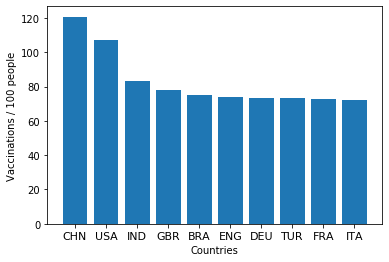

In [130]:
get_bar_plot(top_countries_by_per_100['total_vaccinations_per_hundred'], top_countries_by_abs['iso_code'], xlabel = 'Countries', ylabel='Vaccinations / 100 people')

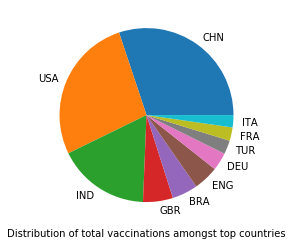

In [134]:
top_countries_by_abs['total_vaccinations_normalized'] = top_countries_by_abs['total_vaccinations'] / sum (top_countries_by_abs['total_vaccinations'])
get_pie_plot(top_countries_by_abs['total_vaccinations_normalized'], top_countries_by_abs['iso_code'], xlabel = "Distribution of total vaccinations amongst top countries")

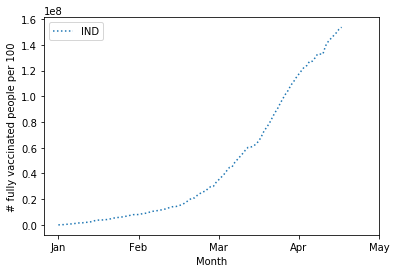

In [138]:
get_line_plot(["IND"], 
         feature="total_vaccinations", 
         xlabel = "Month", 
         ylabel="# fully vaccinated people per 100")

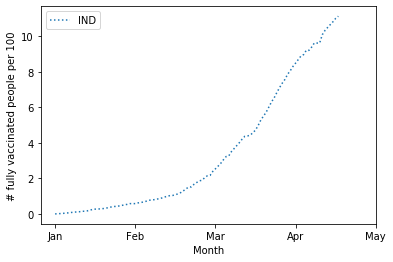

In [139]:
get_line_plot(["IND"], 
         feature="total_vaccinations_per_hundred", 
         xlabel = "Month", 
         ylabel="# fully vaccinated people per 100")